# THE SPARK FOUNDATION [ GRIPMAY2021 ]
## Task 1 - Prediction using Supervised ML
### By - Vivek Lovevanshi

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Reading Given Data

In [2]:
data = "http://bit.ly/w-data"
df = pd.read_csv(data)

In [3]:
df.shape

(25, 2)

In [4]:
# all dataset
df.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Visualization of Data

In [5]:
# Checking if data have any null value
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


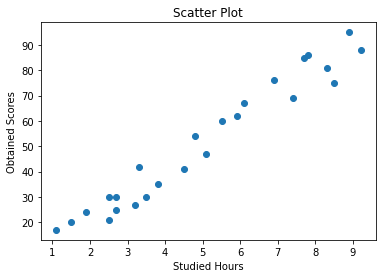

In [8]:
plt.scatter(x = df.Hours, y = df.Scores)
plt.xlabel("Studied Hours")
plt.ylabel("Obtained Scores")
plt.title("Scatter Plot")
plt.show()

### Preparation for Training of ML

In [9]:
#Split Dataset
X = df.drop("Scores", axis = "columns")
y = df.drop("Hours", axis = "columns")
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

shape of X =  (25, 1)
shape of y =  (25, 1)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("shape of X_train = ",X_train.shape)
print("shape of X_test = ",X_test.shape)
print("shape of y_train = ",y_train.shape)
print("shape of y_test = ",y_test.shape)

shape of X_train =  (20, 1)
shape of X_test =  (5, 1)
shape of y_train =  (20, 1)
shape of y_test =  (5, 1)


### Model Selection and Training of ML
As we can see plot shows linear relation

In [11]:
# y = m * x + c
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Model is trainned succesfully

In [12]:
# Coefficient
lr.coef_

array([[9.91065648]])

In [13]:
# Intercept
lr.intercept_

array([2.01816004])

In [14]:
# example
lr.predict([[5]])[0][0]

51.57144244464587

## Making Prediction of test data

In [15]:
y_pred = lr.predict(X_test)

In [16]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["Hours", "Original_Scores", "Predicted_Scores"])

,Hours,Original_Scores,Predicted_Scores
0,1.5,20.0,16.884145
1,3.2,27.0,33.732261
2,7.4,69.0,75.357018
3,2.5,30.0,26.794801
4,5.9,62.0,60.491033


### Visualization

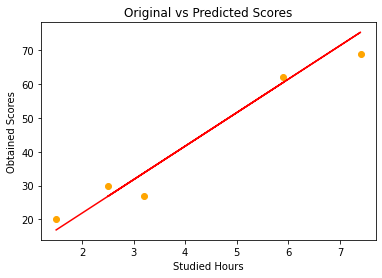

Orange dots = Original Scores
Red line = Predicted Scores


In [17]:
plt.scatter(X_test, y_test, color="orange")
plt.plot(X_test, y_pred, color="red")
plt.ylabel("Obtained Scores")
plt.xlabel("Studied Hours")
plt.title("Original vs Predicted Scores")
plt.show()
print("Orange dots = Original Scores")
print("Red line = Predicted Scores")

In [18]:
## Accuracy of Model
Acc = lr.score(X_test, y_test)*100
print(" Accuracy Of model is ", Acc ,"% ")

 Accuracy Of model is  94.54906892105356 % 


### Saving model

In [19]:
import joblib
joblib.dump(lr, "Student Scores Prediction.pkl")

['Student Scores Prediction.pkl']

# Prediction
### Q. What will be predicted score if a student studies for 9.25 hrs/ day? 

In [20]:
model = joblib.load("Student Scores Prediction.pkl")
hour = 9.25
Score = np.round(model.predict([[hour]])[0][0],2)
print("If a student studies for 9.25 hrs/day Predicted Score = ", Score,)

If a student studies for 9.25 hrs/day Predicted Score =  93.69
